In [1]:
# Retailer X has given you a set of data to help him deduce the following:
#understand the factors associated with loyalty program participation
#Understand the factors associated with increased spending


#Import the various modules needed by running this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import types
#from matplotlib import pyplot
#import types
import seaborn as sns

In [2]:
#Step 1: import your files(customer_data, product_data and transaction_data and read the first 5 rows)
#Hint: use sep syntax in the read_csv function

In [3]:
customerD = pd.read_csv("./Customer_Data.csv")
customerD.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


In [4]:
#Sep was used so that each rows can fall in appropirate column
productD = pd.read_csv("./Product_Data.csv", sep = "|")
productD.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [5]:
#Sep was used so that each rows can fall in appropirate column
transD = pd.read_csv("./Transaction_Data.csv", sep = "|")
transD.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [6]:
#step 2: check the data types 

In [7]:
customerD.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [8]:
productD.dtypes

PRODUCT CODE         int64
PRODUCT CATEGORY    object
UNIT LIST PRICE     object
dtype: object

In [9]:
transD.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
dtype: object

In [10]:
#step3: change each column to its appropriate data type
# FOR ENROLLMENT COULUM AND INCOME TYPES HAS TO BE CHANGED
#INCOME
customerD['INCOME']=customerD['INCOME'].map(lambda x : x.replace('$',''))

In [11]:
customerD['INCOME']=customerD['INCOME'].map(lambda x : int(x.replace(',','')))

In [12]:
customerD['INCOME'].dtypes

dtype('int64')

In [13]:
#Changing enrollment date from object to datetime
from datetime import datetime

In [14]:
customerD['ENROLLMENT DATE']=\
customerD['ENROLLMENT DATE'][customerD['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x, '%d-%m-%Y'))

In [15]:
customerD.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

In [16]:
#step 4: get the statistics for the customer data

In [17]:
customerD.describe(include = "all")

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
count,500.000000,500.000000,500.000000,500.000000,500.000000,500,264,500.000000,500
unique,NaN,NaN,NaN,NaN,NaN,2,256,NaN,4
top,NaN,NaN,NaN,NaN,NaN,enrolled,2015-07-26 00:00:00,NaN,Married
freq,NaN,NaN,NaN,NaN,NaN,264,2,NaN,267
first,NaN,NaN,NaN,NaN,NaN,NaN,2003-03-07 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-24 00:00:00,NaN,NaN
mean,10250.500000,0.498000,42.316000,85792.482000,6.554000,NaN,NaN,2.894000,NaN
std,144.481833,0.500497,17.567509,37157.766304,2.497912,NaN,NaN,1.597457,NaN
min,10001.000000,0.000000,18.000000,20256.000000,1.000000,NaN,NaN,1.000000,NaN
25%,10125.750000,0.000000,30.000000,52429.000000,5.000000,NaN,NaN,2.000000,NaN


In [18]:
# step 5: check the unique data in the marital column to check if the marital status affect customer loyalty

In [19]:
customerD['MARITAL STATUS'].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

In [20]:
#step 6: check for any empty cell in your data set
print('null values for customer data :', customerD.isnull().values.any())
print('null values for transaction data :', transD.isnull().values.any())
print('null values for product data :', productD.isnull().values.any() )

null values for customer data : True
null values for transaction data : False
null values for product data : False


In [21]:
#ANOTHER WAY TO CHECK FOR ANY EMPTY CELL IN YOUR DATA SET
missing_data = customerD.notnull()
missing_data

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,False,True,True
5,True,True,True,True,True,True,False,True,True
6,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,False,True,True


In [22]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")
    

CUSTOMERID
True    500
Name: CUSTOMERID, dtype: int64

GENDER
True    500
Name: GENDER, dtype: int64

AGE
True    500
Name: AGE, dtype: int64

INCOME
True    500
Name: INCOME, dtype: int64

EXPERIENCE SCORE
True    500
Name: EXPERIENCE SCORE, dtype: int64

LOYALTY GROUP
True    500
Name: LOYALTY GROUP, dtype: int64

ENROLLMENT DATE
True     264
False    236
Name: ENROLLMENT DATE, dtype: int64

HOUSEHOLD SIZE
True    500
Name: HOUSEHOLD SIZE, dtype: int64

MARITAL STATUS
True    500
Name: MARITAL STATUS, dtype: int64



In [23]:
# Step 7: check for the column with the empty cell in the data set affected.
customerD.columns[customerD.isna().any()].tolist()

['ENROLLMENT DATE']

Text(0.5, 1.0, 'MARITAL STATUS BAR CHART')

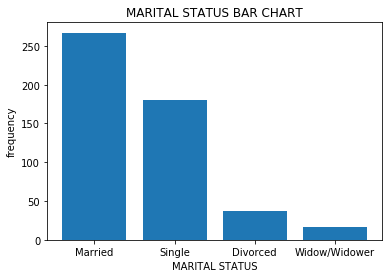

In [24]:
# step 8: using the bar chart, check for the marital status with the highest frequency
%matplotlib inline
import matplotlib as pll

labels = ("Married","Single","Divorced", "Widow/Widower")
pll.pyplot.bar(labels, customerD['MARITAL STATUS'].value_counts())
pll.pyplot.xlabel('MARITAL STATUS')
pll.pyplot.ylabel("frequency")
pll.pyplot.title('MARITAL STATUS BAR CHART')

Text(0.5, 1.0, 'AGE HISTOGRAM')

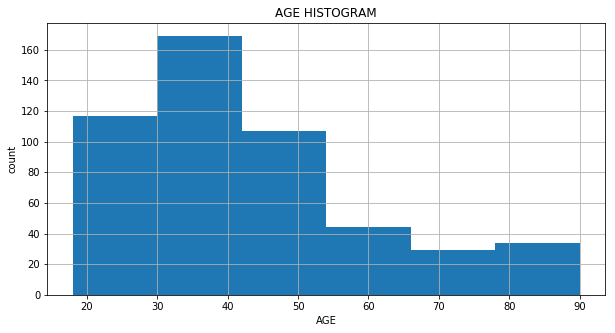

In [25]:
# step 9: using histogram, check if age affects customer loyalty
#IMPORT MATPLOTLIB as pll so it wouldn't confuse the scatter plot plt
%matplotlib inline
import matplotlib as pll

customerD['AGE'].hist(bins=6,figsize=(10,5))

pll.pyplot.xlabel("AGE")
pll.pyplot.ylabel("count")
pll.pyplot.title("AGE HISTOGRAM")

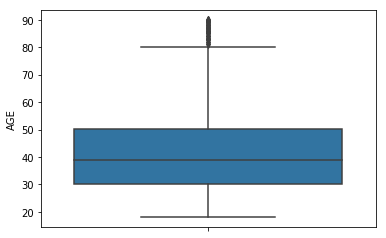

In [26]:
#step 10: use boxplot to get a better view of the age disparity
#WE CAN SEE THERE IS AN OULIER FROM 80 TO 90
sns.boxplot(y = "AGE",data= customerD)


In [27]:
#step 10: get the age statistics
customerD['AGE'].describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

In [28]:
#step 11: merge the transaction data and the product data 
trans_product = transD.merge(productD, how='inner', left_on="PRODUCT NUM", right_on="PRODUCT CODE")

In [29]:
#step 11: check the data type and convert appropriately
trans_product.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE        object
dtype: object

In [30]:
trans_product['UNIT LIST PRICE'] = trans_product['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [31]:
trans_product.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

In [32]:
#step 12: get the total price for each transaction
trans_product['TOTAL PRICE'] = trans_product['QUANTITY PURCHASED'] * trans_product['UNIT LIST PRICE'] * (1- trans_product['DISCOUNT TAKEN'])

In [33]:
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


In [34]:
#step 13: get the revenue generated on each product category, sort in descending order and rename appropriately
revenue_per_product = trans_product.groupby('PRODUCT CATEGORY').agg({'TOTAL PRICE' : 'sum'}).sort_values('TOTAL PRICE', ascending= False)

In [35]:
revenue_per_product

,TOTAL PRICE
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


In [36]:
#renaming Total price name appropriately
revenue_by_product = revenue_per_product.rename(columns = {'TOTAL PRICE':'REVENUE PER PRODUCT'})

In [37]:
revenue_by_product

,REVENUE PER PRODUCT
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


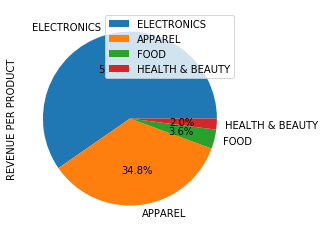

In [38]:
#step 14: visualize the revenue using pie-chart to display the percentage of revenue for each product
#category
revenue_by_product['REVENUE PER PRODUCT'].plot(kind='pie', autopct='%1.1f%%', legend=True)

In [39]:
'''
    Let us calculate for each customer the following
measures, and see whether any of these measures affects loyalty enrolment:
Total spends per category
Total spends
Most recent transaction dates
Average Discount taken
'''

#step 16: group the cudtomer data by the customer nuber and product category,and sum the total 


'\n    Let us calculate for each customer the following\nmeasures, and see whether any of these measures affects loyalty enrolment:\nTotal spends per category\nTotal spends\nMost recent transaction dates\nAverage Discount taken\n'

In [40]:
#TOTAL SPENDS PER CATEGORY
customer_product_categ = trans_product.groupby(['CUSTOMER NUM', 'PRODUCT CATEGORY']).agg({'TOTAL PRICE':'sum'})

In [41]:
customer_product_categ.head()

TOTAL PRICE
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [42]:
customer_product_categ.columns

Index(['TOTAL PRICE'], dtype='object')

In [43]:
# Make it permanent by assigning a name to the new created data set
customer_product_categ = customer_product_categ.reset_index()

In [44]:
'''Note that only Total_Price appears as the single column in the data frame, and
that the other two columns, “Customer Num” and” Product category”, were not
listed. This occurs because when you group by some columns, they change from
a column to a multi- or a hierarchical index. To revert them back, use the
reset_index() method.'''

'Note that only Total_Price appears as the single column in the data frame, and\nthat the other two columns, “Customer Num” and” Product category”, were not\nlisted. This occurs because when you group by some columns, they change from\na column to a multi- or a hierarchical index. To revert them back, use the\nreset_index() method.'

In [45]:
customer_product_categ.reset_index().head()

,index,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL PRICE
0,0,10001,APPAREL,4022.430
1,1,10001,ELECTRONICS,1601.315
2,2,10001,FOOD,68.688
3,3,10001,HEALTH & BEAUTY,1134.337
4,4,10002,APPAREL,2312.509


In [46]:
'''Let us reorganize the data and create a summary report that shows the spending
on each product category per customer. Use the “Pivot” function to create a
pivot table.
The Pivot function needs three main arguments:
The index, which sets the column to use as an index.
The columns, which are the pivot columns to use.
The values to populate new frame’s values.
'''

'Let us reorganize the data and create a summary report that shows the spending\non each product category per customer. Use the “Pivot” function to create a\npivot table.\nThe Pivot function needs three main arguments:\nThe index, which sets the column to use as an index.\nThe columns, which are the pivot columns to use.\nThe values to populate new frame’s values.\n'

In [47]:
#USING PIVOT TABLE
customer_pivot = customer_product_categ.pivot(index='CUSTOMER NUM', columns='PRODUCT CATEGORY', values='TOTAL PRICE')
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


In [48]:
'''calculate the latest transaction date and the total spend for each customer
#1.Convert the transaction date to a datetime object so that you can use an
aggregate function
#2. Calculate the measures by using the “groupby” and “agg” functions
#3.Join the newly created Pandas data frame (recent_trans_total_spend) with the
customer pivot table to create a view for each customer that contains the
following information:
Total spend
Total spend per category
Recent transaction date
'''

'calculate the latest transaction date and the total spend for each customer\n#1.Convert the transaction date to a datetime object so that you can use an\naggregate function\n#2. Calculate the measures by using the “groupby” and “agg” functions\n#3.Join the newly created Pandas data frame (recent_trans_total_spend) with the\ncustomer pivot table to create a view for each customer that contains the\nfollowing information:\nTotal spend\nTotal spend per category\nRecent transaction date\n'

In [49]:
#TOTAL SPENDS
trans_product['TRANSACTION DATE']=trans_product['TRANSACTION DATE'].map(lambda x :datetime.strptime(x, '%m/%d/%Y') )

In [50]:
trans_product['TRANSACTION DATE'].head()

0   2015-01-02
1   2015-01-02
2   2015-01-02
3   2015-01-02
4   2015-01-02
Name: TRANSACTION DATE, dtype: datetime64[ns]

In [51]:
recent_tran_total_spend =trans_product.groupby('CUSTOMER NUM').\
agg({'TRANSACTION DATE' :'max', 'TOTAL PRICE' : 'sum'}). \
rename(columns={'TRANSACTION DATE':'RECENT TRANSACTION DATE','TOTAL PRICE':'TOTAL SPENT'})
recent_tran_total_spend.head()

,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512


In [52]:
#4. Create the join on the common index, which is Customer NUM
customer_KPI =customer_pivot.merge(recent_tran_total_spend, how='inner',left_index=True, right_index=True)

In [53]:
customer_KPI.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512


In [54]:
#Replace the Null values with zeros by using the fillna function.
customer_KPI = customer_KPI.fillna(0)

In [55]:
customer_KPI.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
10005,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [56]:
#Augment this view with the customer original data set to provide a holistic view
#for Retailer X about its customers by performing another join.

customer_all_data_merge = customerD.merge(customer_KPI, how='inner', left_on='CUSTOMERID', right_index=True)
customer_all_data_merge.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [57]:
#use a Pandas crosstab to compute a simple cross-tabulation brtween gender and loyalty group, which is a tool that
#you can use to compare the relationship between two variables in tabular form,
#especially categorical variables

table= pd.crosstab(customer_all_data_merge['GENDER'], customer_all_data_merge['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


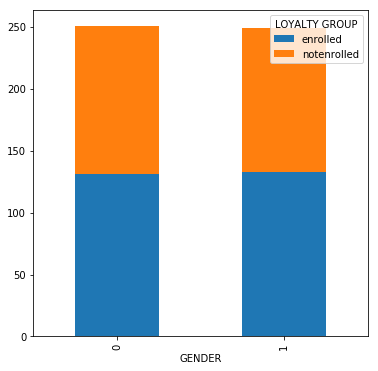

In [58]:
# plot the table in a bar chart 
#Question: Does gender affect loyalty enrollment?

table.plot(kind='bar', stacked=True,figsize=(6,6))

In [59]:
# Using cross-tabulation and bar chart,Does the experience score affect loyalty enrollment?

table1=pd.crosstab(customer_all_data_merge['EXPERIENCE SCORE'], customer_all_data_merge['LOYALTY GROUP'])
table1.head()

LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23


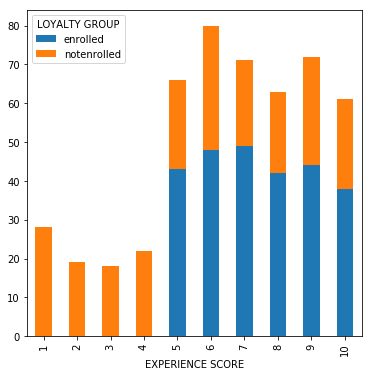

In [60]:
#ENROLLMENT BAR CHART WITH LOYALTY GROUP
table1.plot(kind='bar', stacked=True, figsize=(6,6))

In [61]:
'''Age is a continuous variable. To see the significance of age regarding loyalty
enrollment, bin several age groups, and for each one compute the number of
enrolled versus not-enrolled.
The Pandas cut command automatically bins values into discrete intervals. You use
it to derive a new Pandas column that is called “Age_Binned”, which represents the
age group of the customer. In this exercise, you create 10 age groups (bins)
'''

'Age is a continuous variable. To see the significance of age regarding loyalty\nenrollment, bin several age groups, and for each one compute the number of\nenrolled versus not-enrolled.\nThe Pandas cut command automatically bins values into discrete intervals. You use\nit to derive a new Pandas column that is called “Age_Binned”, which represents the\nage group of the customer. In this exercise, you create 10 age groups (bins)\n'

In [62]:
#CREATING AGE BINNED USING 10 INTERVALS
customer_all_data_merge['AGE BINNED'] =pd.cut(customer_all_data_merge['AGE'],10)

In [63]:
customer_all_data_merge['AGE BINNED'].value_counts()

(32.4, 39.6]      94
(39.6, 46.8]      91
(25.2, 32.4]      86
(17.928, 25.2]    78
(46.8, 54.0]      51
(54.0, 61.2]      24
(82.8, 90.0]      23
(61.2, 68.4]      23
(75.6, 82.8]      16
(68.4, 75.6]      14
Name: AGE BINNED, dtype: int64

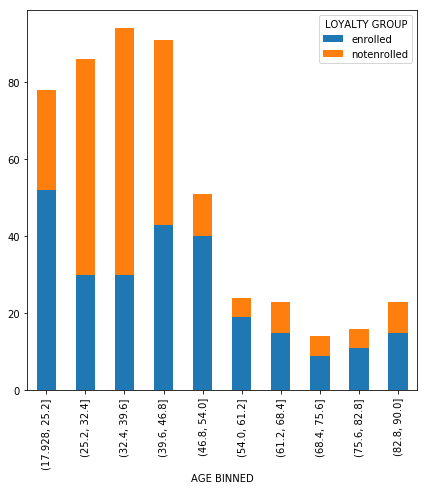

In [64]:
# Using cross-tabulation and bar chart,Does the Age score affect loyalty enrollment?

table3 = pd.crosstab(customer_all_data_merge['AGE BINNED'], customer_all_data_merge['LOYALTY GROUP'])
table3.plot(kind='bar', stacked= True, figsize=(7,7))

In [65]:
#AGGREGATE OF AGE MEAN BY GROUPING WITH LOYALTY GROUP
customer_all_data_merge.groupby('LOYALTY GROUP').agg({'AGE': 'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


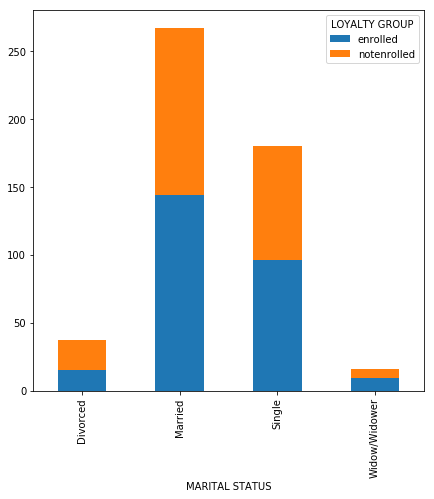

In [66]:
#Does marital status affect loyalty enrollment?
#stacked= True here is to overlay enrolled and notenrolled on each other
table2=pd.crosstab(customer_all_data_merge['MARITAL STATUS'], customer_all_data_merge['LOYALTY GROUP'])
table2.plot(kind='bar', stacked=True, figsize=(7,7))

In [67]:
#As total spend is a continuous variable, divide it into 10 discrete intervals and plot
#them as a stacked bar chart.

customer_all_data_merge['TOTAL SPENT BINNED'] =pd.cut(customer_all_data_merge['TOTAL SPENT'], 10)

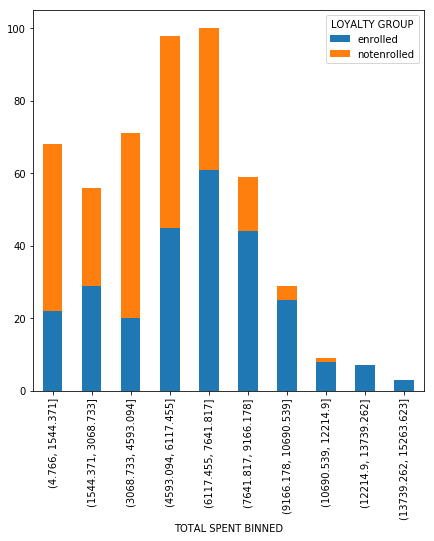

In [68]:
#STACKED BAR CHART PLOT
table4 = pd.crosstab(customer_all_data_merge['TOTAL SPENT BINNED'], customer_all_data_merge['LOYALTY GROUP'])
table4.plot(kind='bar', stacked=True, figsize=(7,7))

In [69]:
#
'''You have tried to understand what factors might affect participation in the loyalty
program. Now, you will understand what factors affect the total spending of a
customer.
Bivariate Analysis (2-variable analysis) – Customer spend as a target variable
Conduct some bivariate analysis to analyze the relationship between some variables
and customer spending (the target variable) to test whether there is an association.
Age
Age is a continuous variable, as is the total spend. Display them together in a scatter plot.
Based on this graph, does age influence total spending?
'''

'You have tried to understand what factors might affect participation in the loyalty\nprogram. Now, you will understand what factors affect the total spending of a\ncustomer.\nBivariate Analysis (2-variable analysis) – Customer spend as a target variable\nConduct some bivariate analysis to analyze the relationship between some variables\nand customer spending (the target variable) to test whether there is an association.\nAge\nAge is a continuous variable, as is the total spend. Display them together in a scatter plot.\nBased on this graph, does age influence total spending?\n'

Text(0.5, 1.0, 'TOTAL SPENT VS AGE')

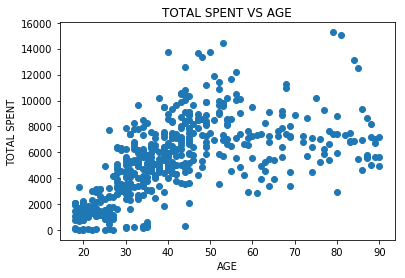

In [70]:
plt.scatter(customer_all_data_merge['AGE'],customer_all_data_merge['TOTAL SPENT'])
plt.xlabel('AGE')
plt.ylabel('TOTAL SPENT')
plt.title( 'TOTAL SPENT VS AGE')


Text(0.5, 1.0, 'TOTAL SPENT VS INCOME')

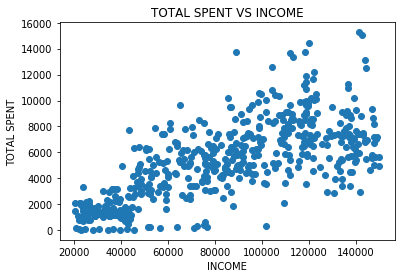

In [71]:
#Create a scatter plot to show the relationship betweeen income and total spend, and then calculate the Pearson correlation

plt.scatter(customer_all_data_merge["INCOME"], customer_all_data_merge["TOTAL SPENT"])
plt.xlabel('INCOME')
plt.ylabel('TOTAL SPENT')
plt.title( 'TOTAL SPENT VS INCOME')

In [72]:
from scipy.stats import pearsonr
pearsonr(customer_all_data_merge['INCOME'], customer_all_data_merge["TOTAL SPENT"])
         

(0.6880311084625118, 2.322632696381397e-71)

In [73]:
#pearsonr correletion for age, as we can see INCOME as more correlation to TOTAL SPENT than age.
pearsonr(customer_all_data_merge['AGE'],customer_all_data_merge['TOTAL SPENT'])

(0.5760170677259271, 1.5608217502782303e-45)

In [74]:
#Examine the relationship between the experience score (which is a categorical
#feature) and total spend (which is continuous). 

table =customer_all_data_merge.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT' : 'mean'}).reset_index()

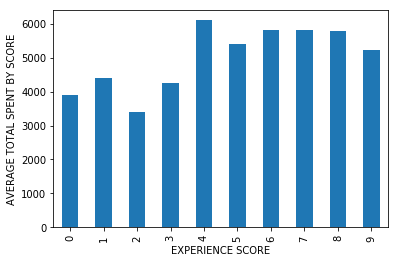

In [75]:
table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel("EXPERIENCE SCORE")
plt.ylabel("AVERAGE TOTAL SPENT BY SCORE")
plt.show()

In [84]:
#THIS IS TO DISPLAY JUST FIVE ROWS ON THE TABLE
table.head()

,EXPERIENCE SCORE,TOTAL SPENT
0,1,3911.019036
1,2,4410.997842
2,3,3395.602222
3,4,4257.461455
4,5,6097.330864
